In [163]:
from sklearn.datasets import make_regression

In [164]:
X,y = make_regression(n_samples=100, n_features=1, n_targets=1, n_informative=1, random_state=11, noise=20)

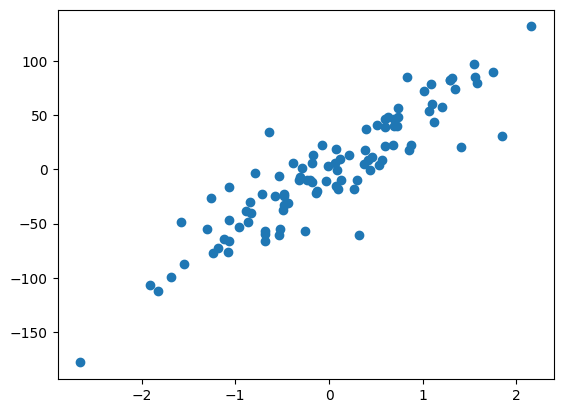

In [165]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [166]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=18)

In [167]:
from sklearn.linear_model import LinearRegression

In [168]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [169]:
lr.coef_

array([54.15886929])

In [170]:
lr.intercept_

np.float64(-4.0550173305458745)

In [171]:
from sklearn.metrics import r2_score

In [172]:
y_pred = lr.predict(x_test)
r2_score(y_pred, y_test)

0.6694286388904935

In [173]:
import numpy as np

In [191]:
class GDRegressor:
    def __init__(self, learning_rate, epochs):
        self.m = 1
        self.b = 0
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        for i in range(self.epochs):
            loss_slope_b = -2*np.sum(y_train - self.m*X.ravel() - self.b)
            loss_slope_m = -2*np.sum((y_train - self.m*X.ravel() - self.b)*X.ravel())

            self.b = self.b - (self.learning_rate * loss_slope_b)
            self.m = self.m - (self.learning_rate * loss_slope_m)

    def predict(self, x_test):
        return (self.m * x_test) + self.b
        

In [192]:
gd = GDRegressor(0.001, 50)
gd.fit(x_train, y_train)

In [193]:
y_pred1 = gd.predict(x_test)

In [194]:
from sklearn.metrics import r2_score

r2_score(y_pred1, y_test)

0.6693654136633747

In [195]:
class BGDRegressor:
    def __init__(self, lr, epochs):
        self.lr = lr
        self.epochs = epochs
        self.w0 = 0
        self.w = None

    def fit(self, x_train, y_train):
        n_samples, n_features = x_train.shape
        self.w = np.ones((n_features, 1))
        y_train = y_train.reshape(-1, 1)  # Ensure column vector

        for i in range(self.epochs):
            y_hat = self.w0 + np.dot(x_train, self.w)
            error = y_train - y_hat

            slope_w0 = -2 * np.mean(error)
            slope_w = (-2 * np.dot(x_train.T, error)) / n_samples

            self.w0 -= self.lr * slope_w0
            self.w -= self.lr * slope_w

        print(f"Slope (weights):\n{self.w}")
        print(f"Intercept (w0): {self.w0}")

    def predict(self, x_test):
        return np.dot(x_test, self.w) + self.w0


In [242]:
bgd = BGDRegressor(0.001, 4000)
bgd.fit(x_train, y_train)

Slope (weights):
[[54.0864207]]
Intercept (w0): -4.0313670395774155


In [243]:
y_pred2 = bgd.predict(x_test)

In [244]:
from sklearn.metrics import r2_score

r2_score(y_pred2, y_test)

0.6693178244382124